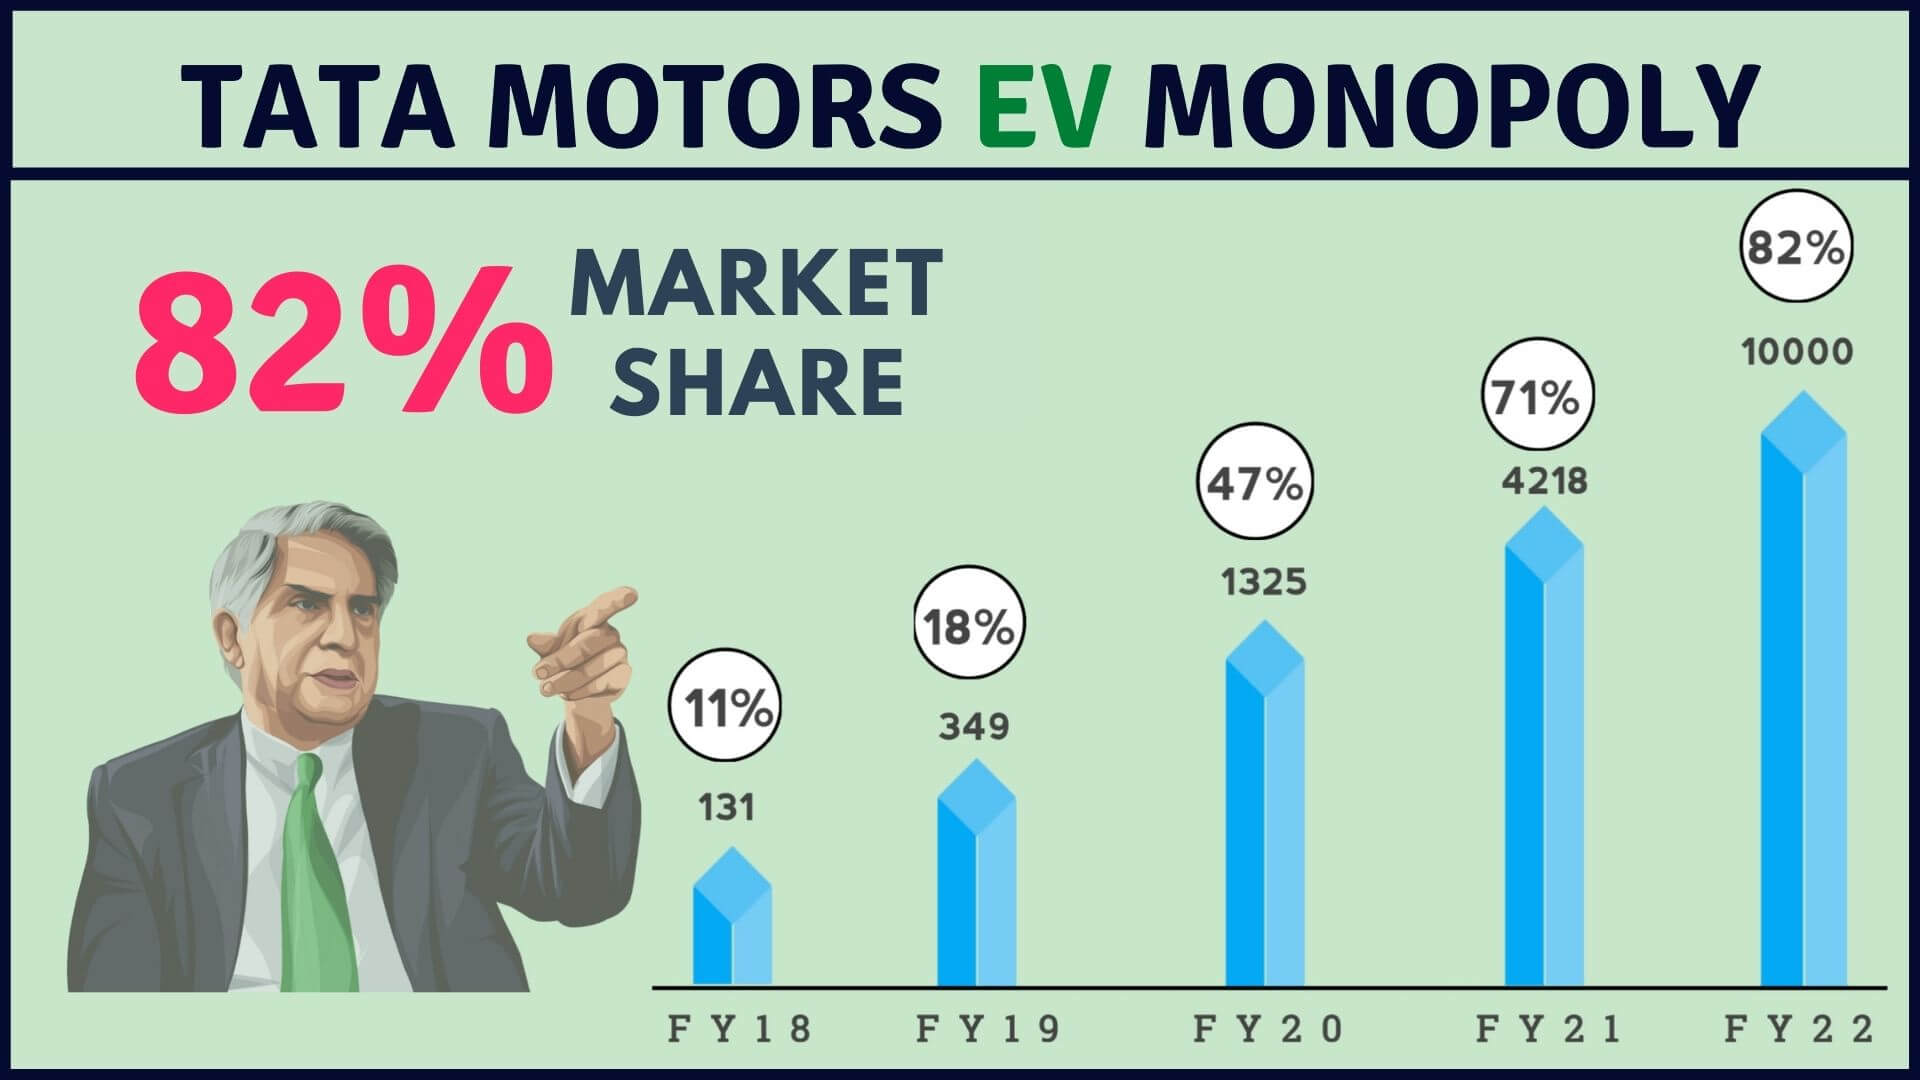

In [171]:
from IPython import display
display.Image("Tata_Motors.jpg")

- Connect with me(Linkedin): https://www.linkedin.com/in/sai-subhasish-rout-655707151/
- Follow me for more such contents(github): https://github.com/saisubhasish

# Introduction to Time Series Forecasting

A **time series** is a sequence of data points that occur in successive order over some period of time. 

A time series can be **yearly** (for example, an annual budget), **quarterly** (for example, expenses), **monthly** (for example, air traffic), **weekly** (for example, sales quantity), **daily** (for example, weather), **hourly** (for example, stock prices), **minutes** (for example, inbound calls in a call centre), or even **seconds** in length, depending on the frequency (ex: web traffic).

Forecasting is the next step in the process, and it involves predicting the series' future values. When you generate scientific forecasts based on historical time stamped data, you're doing **time series forecasting**. It entails developing models based on previous data and applying them to make observations and guide future strategic decisions. A key distinction in forecasting is that the future outcome is completely unknown at the time of the work and can only be anticipated by meticulous analysis and evidence-based priors.

Now forecasting a time series can be broadly divided into two types.

- **Univariate Time Series Forecasting** is when you utilise only the prior values of a time series to predict its future values.

**For example** Here we have to forecast close price, so we are taking only past close prices to forecast prices in upcoming days

| Close | 
| --- | 
| 67.405298 | 
| 68.459983 |
| 69.785998 | 
| 70.225955 | 
| 65.345345 | 
| 68.353453 | 
| 69.345347 | 

--------------------------------

- **Multi Variate Time Series Forecasting** is when you employ predictors other than the series (also known as exogenous variables) to forecast.

**For example** Here close price value is dependent on open, high and low price values so we can use all these as features to fit our multivariate model and forecast close price value. 

| Close | Open | High | Low |
| --- | --- | --- | --- |
| 67.405998 | 70.123879 | 70.234878 | 66.438729 |
| 68.673246 | 71.237498 | 71.349828 | 67.278949	|
| 69.378432 | 72.892348 | 73.238947 | 68.298137	|
| 70.482379 | 71.782687 | 71.172838 | 66.982374	|
| 65.238973 | 74.928749 | 75.823890 | 63.287343	|
| 68.289349 | 75.389724 | 76.982479 | 66.248789	|
| 69.732878 | 78.287389 | 79.983789 | 65.737999	|

<hr style="border:1px solid black"> </hr>

#  Introduction to ARIMA Models

ARIMA models are a type of statistical model that can be used to analyse and forecast time series data. It gives a simple yet powerful way for creating time series forecasts by explicitly catering to a set of common structures in time series data.

ARIMA is an acronym for **AutoRegressive Integrated Moving Average**. It's a more complex version of the AutoRegressive Moving Average, with the addition of integration.


An ARIMA model is characterized by 3 terms: p, d, q
where,

- **p** is the order of the AR term. The number of lag observations included in the model, also called the lag order.

- **q** is the size of the moving average window, also called the order of moving average.

- **d** is the number of differencing required to make the time series stationary.

**What does ARIMA(p, d, q) mean?** 

For example :

- ARIMA(1, 0, 3) signifies that you're combining a 1st order Auto-Regressive model and a 3rd order Moving Average model to describe some response variable (Y) in your model. It's a good idea to think about it this way: (AR, I, MA). In simple words, this gives your model the following appearance:

    Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

    The 0 between the 1 and the 3 represents the 'I' part of the model (the Integrative component), which denotes a model that takes the difference between response variable data - this can be done with non-stationary data, but you don't appear to be dealing with that, so ignore it.


- ARIMA(2, 1, 2) signifies that you're combining a 2nd order AR model and also a 2nd order MA model to describe Y. d = 1st denotes that the model used 1 order differencing to make the data stationary.

Just like these examples we have to find perfect order of p, d and q to fit the best model.

**There are a number of ways to find values of p, q and d:**

- look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
- look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
- look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
- try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
- try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values
-------------------------------
Before working with non-stationary data, the Autoregressive Integrated Moving Average (ARIMA) Model converts it to stationary data. One of the most widely used models for predicting linear time series data is this one.

The ARIMA model has been widely utilized in banking and economics since it is recognized to be reliable, efficient, and capable of predicting short-term share market movements.


<hr style="border:1px solid black"> </hr>

**Problem Statement** : In this notebook, we are going to use the ARIMA, SARIMA and Auto ARIMA model to forecast the stock price of Tesla.
<hr style="border:1px solid black"> </hr>

## Import the necessary libraries

In [5]:
!pip install pmdarima
!pip install pandas-datareader

In [143]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

## Loading the dataset

We are using historical prices of 3 year (03/2020 - Today) for TATA Motors stock.

In [26]:
tata_moto = pdr.get_data_yahoo('TATAMOTORS.NS', start='2020-3-1')
tata_moto

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,133.000000,133.899994,123.800003,125.400002,125.400002,111585697
2020-03-03,127.500000,131.399994,125.250000,130.350006,130.350006,86765576
2020-03-04,129.600006,129.600006,120.550003,126.199997,126.199997,97546902
2020-03-05,127.550003,129.149994,124.250000,125.750000,125.750000,87795649
2020-03-06,115.000000,117.300003,112.800003,114.199997,114.199997,83971462
...,...,...,...,...,...,...
2023-01-13,413.000000,416.350006,408.000000,411.500000,411.500000,10449630
2023-01-16,413.500000,414.899994,407.600006,413.000000,413.000000,11462140
2023-01-17,413.000000,419.450012,412.500000,415.299988,415.299988,12337969


In [27]:
# Save dataframe as CSV file

tata_moto.to_csv('TATA_Motors.csv')

In [28]:
# Reading data

stock_data = pd.read_csv('TATA_Motors.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,133.000000,133.899994,123.800003,125.400002,125.400002,111585697
1,2020-03-03,127.500000,131.399994,125.250000,130.350006,130.350006,86765576
2,2020-03-04,129.600006,129.600006,120.550003,126.199997,126.199997,97546902
3,2020-03-05,127.550003,129.149994,124.250000,125.750000,125.750000,87795649
4,2020-03-06,115.000000,117.300003,112.800003,114.199997,114.199997,83971462


In [29]:
# As we are performing UniVariate Time Series Analysis so we will conside only close price.

stock_data = stock_data[['Date','Close']] # filtering the dataframe to date and close price

In [30]:
stock_data

,Date,Close
0,2020-03-02,125.400002
1,2020-03-03,130.350006
2,2020-03-04,126.199997
3,2020-03-05,125.750000
4,2020-03-06,114.199997
...,...,...
714,2023-01-13,411.500000
715,2023-01-16,413.000000
716,2023-01-17,415.299988
717,2023-01-18,408.399994


In [31]:
# Basic information

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    719 non-null    object 
 1   Close   719 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.4+ KB


#### Report:
- Date column has datatype as object

In [32]:
#pd.to_datetime()    #this method we use for coverting into date time

In [33]:
# COnverting datatype

stock_data.Date = pd.to_datetime(stock_data.Date) # convert Date data type ('object') to datetime

In [34]:
# Checking datatype

stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    719 non-null    datetime64[ns]
 1   Close   719 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.4 KB


In [35]:
stock_data

,Date,Close
0,2020-03-02,125.400002
1,2020-03-03,130.350006
2,2020-03-04,126.199997
3,2020-03-05,125.750000
4,2020-03-06,114.199997
...,...,...
714,2023-01-13,411.500000
715,2023-01-16,413.000000
716,2023-01-17,415.299988
717,2023-01-18,408.399994


In [36]:
# setting 'Date' column as index

stock_data = stock_data.set_index("Date") 

In [37]:
stock_data.head(5) 

,Close
Date,
2020-03-02,125.400002
2020-03-03,130.350006
2020-03-04,126.199997
2020-03-05,125.750000
2020-03-06,114.199997


In [160]:
stock_data['Close'].min()

65.30000305175781

In [164]:
stock_data[stock_data['Close']==65.30000305175781]

,Close
Date,
2020-04-03,65.300003


#### Report:
- All time low of the stock in this dataset was on 4th April 2020

In [162]:
stock_data['Close'].max()

530.1500244140625

In [165]:
stock_data[stock_data['Close']==530.1500244140625]

,Close
Date,
2021-11-17,530.150024


#### Report:
- All time high of the stock in this dataset was on 17th Nov 2021
- Which was more than 800% growth from all time low

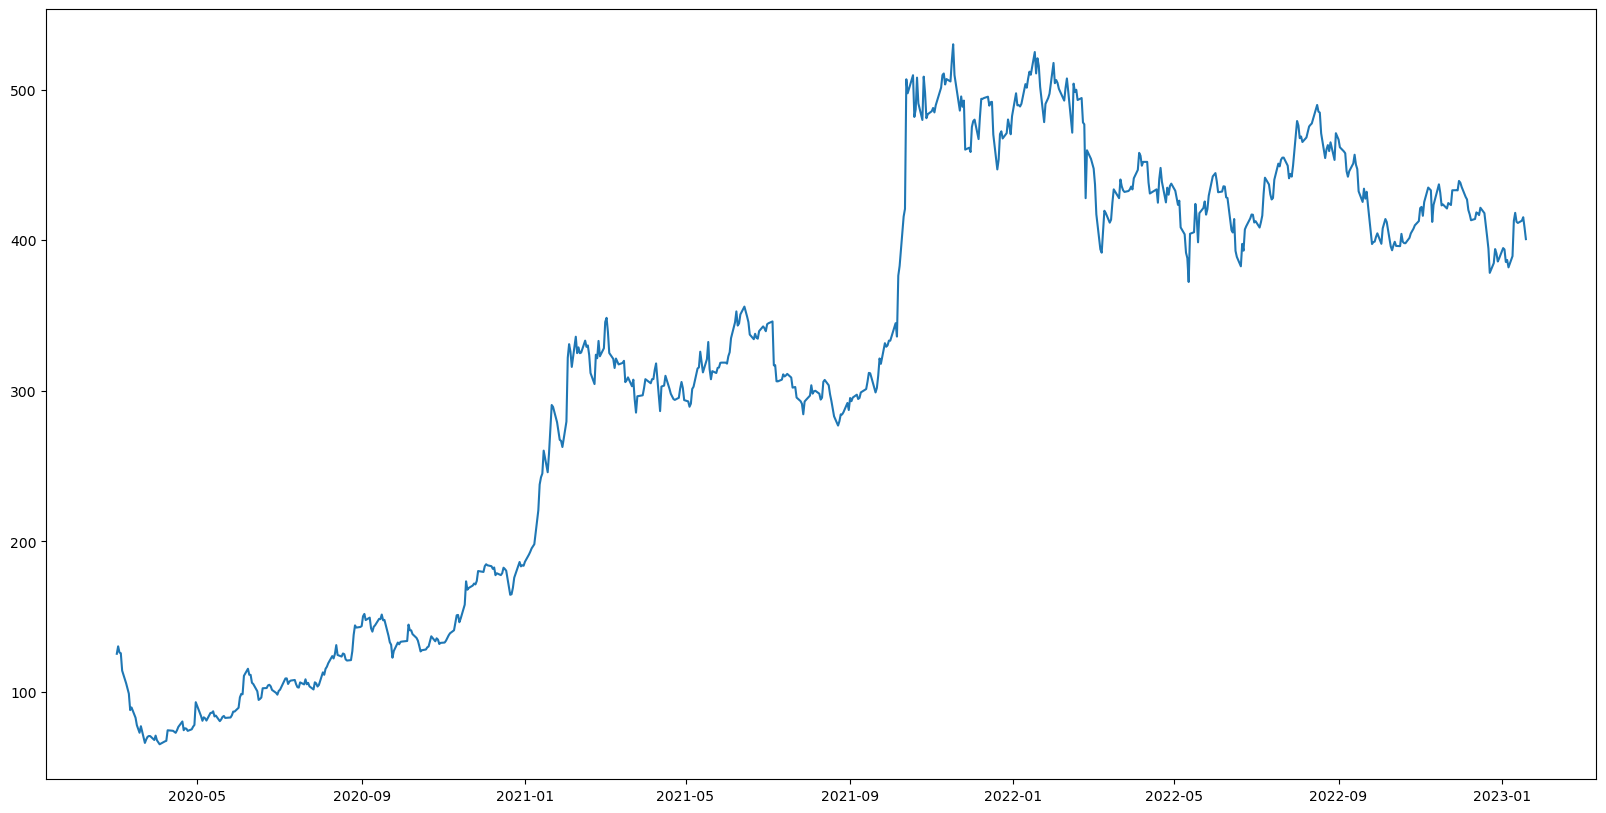

In [41]:
# Plotting the closing price of the day  -->>(Line Chert)

plt.figure(figsize=(20,10))
import matplotlib.pyplot as plt
plt.plot(stock_data['Close'])

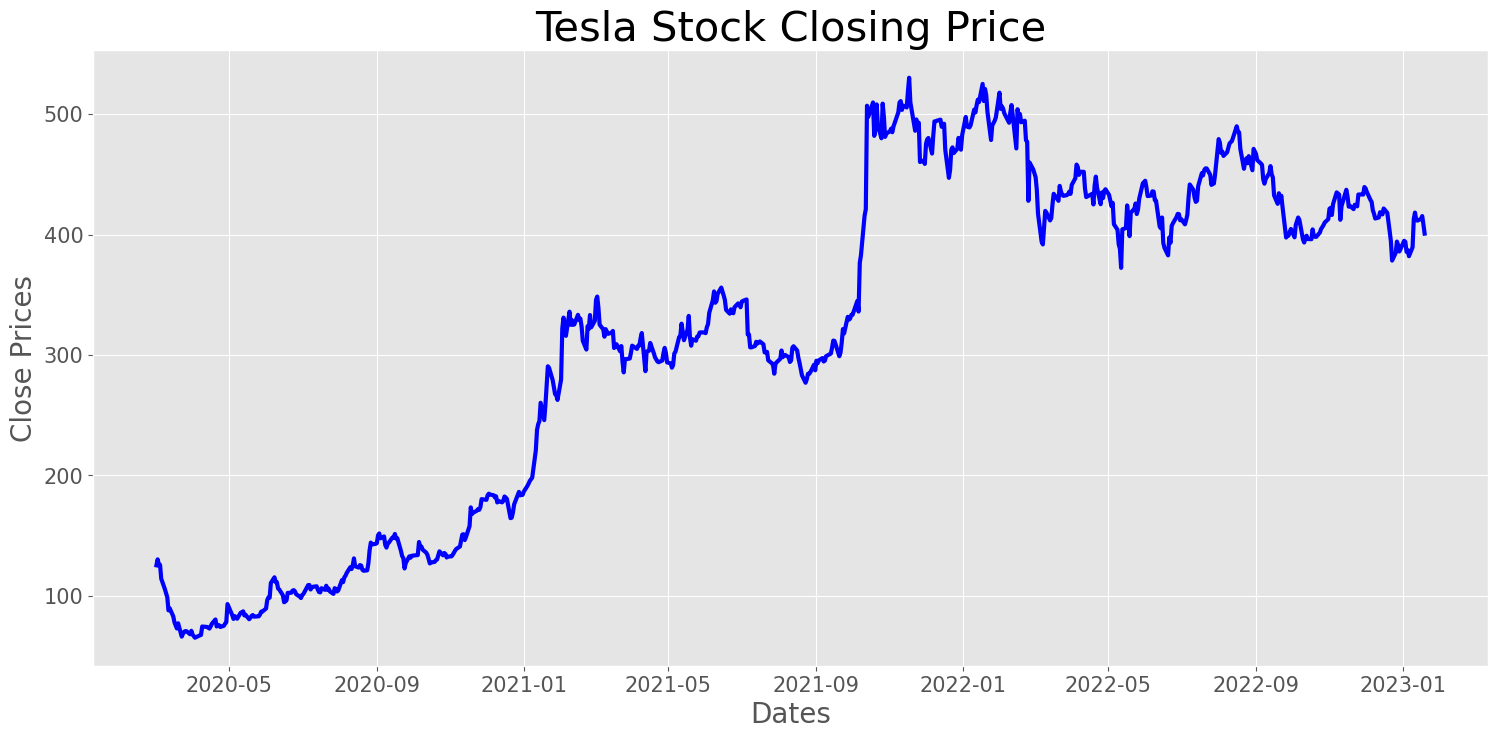

In [42]:
# plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Density'>

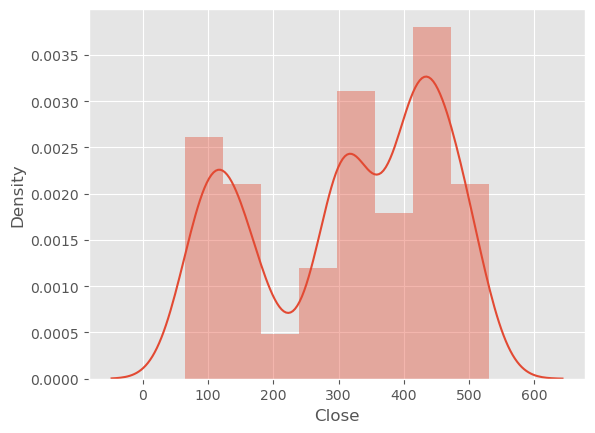

In [43]:
# Distplot

import seaborn as sns
sns.distplot(stock_data['Close'])

A probability distribution can also be used to illustrate the data in our series.

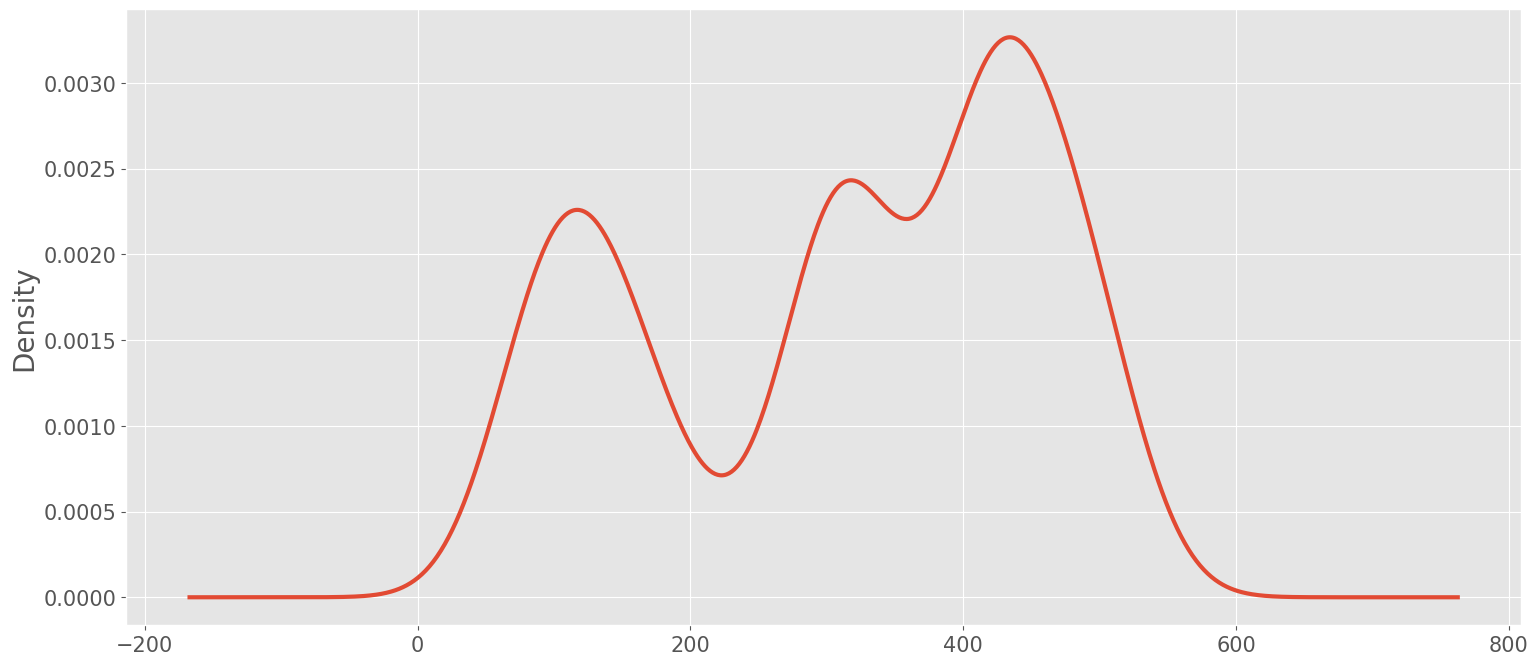

In [45]:
# KDE plot of the close price  

df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

<hr style="border:1px solid black"> </hr>
A time series is also thought to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.

The components' definitions are as follows:
- The **level** is the sum of all the values in a series.
- The **trend** is the upward or downward movement of the series' value.
- The series' short-term cycle is known as **seasonality**.
- **Noise** is the term for the random variation in the series.
------------------------------------
## Check for stationarity

Time series analysis only works with stationary data, so we must first determine **whether a series is stationary.**
Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

**What does it mean for data to be stationary?**

- The mean of the series should not be a function of time. Because the mean increases over time, the red graph below is not stationary.

<img src="https://imgur.com/LjtBXwf.png">
- The variance of the series should not be a function of time. Homoscedasticity is the term for this characteristic. The varying spread of data over time can be seen in the red graph.

<img src="https://imgur.com/v2Uye7X.png">

- Finally, neither the I th term nor the (I + m) th term's covariance should be a function of time. As you can see in the graph below, the spread gets less as time goes on. As a result, the'red series' covariance does not remain constant throughout time.

<img src="https://i.imgur.com/6HVlvg2.png">

<hr style="border:1px solid black"> </hr>

### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most extensively used statistical tests. It can be used to establish whether a series has a unit root and, as a result, whether the series is stationary. The null and alternate hypotheses for this test are:
Distinguish between point to point links and multi point links
**Null Hypothesis**: The series has a unit root (a =1).

**Alternative Hypothesis**: There is no unit root in the series.

The series is considered to be non-stationary if the null hypothesis is not rejected. As a result, the series can be linear or difference stationary.
If both the mean and standard deviation are flat lines, the series becomes stationary (constant mean and constant variance).

In [46]:
stock_data

,Close
Date,
2020-03-02,125.400002
2020-03-03,130.350006
2020-03-04,126.199997
2020-03-05,125.750000
2020-03-06,114.199997
...,...
2023-01-13,411.500000
2023-01-16,413.000000
2023-01-17,415.299988


In [47]:
# Type of Close column

type(stock_data['Close'])

pandas.core.series.Series

In [52]:
# Mean of the 'Close' column data for 1st 12 days

np.mean(stock_data['Close'].head(12))

103.3874994913737

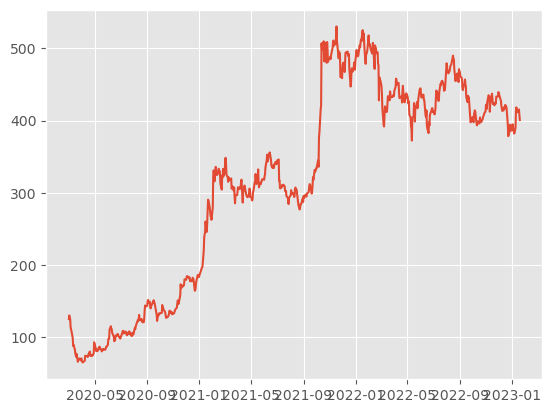

In [53]:
# Plot

plt.plot(stock_data['Close'])

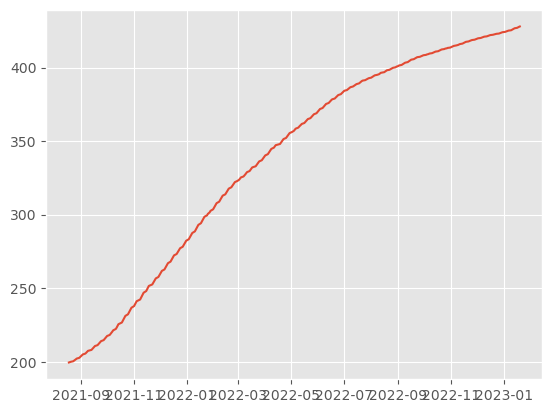

In [54]:
# Plotting mean where'Window'=365  (SMA)

plt.plot(stock_data['Close'].rolling(365).mean())

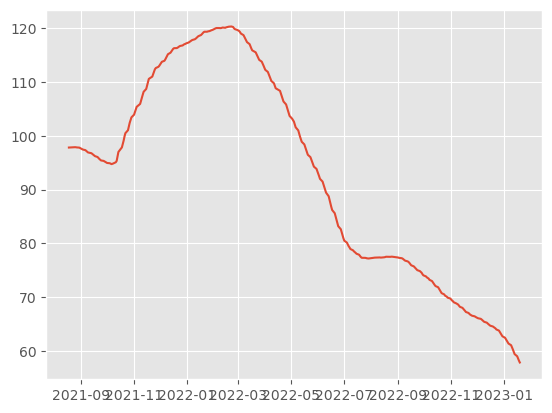

In [55]:
# Plotting standard deviation where'Window'=365 

plt.plot(stock_data['Close'].rolling(365).std())

In [56]:
# Adafuller test of the data to check stationary
# Adafuller test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not


adfuller(stock_data['Close'],autolag='AIC')

(-1.350157504507677,
 0.6059245234197764,
 4,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 5088.186381173886)

In [57]:
rolmean = stock_data.rolling(12).mean() # rolling mean
rolstd = stock_data.rolling(12).std() # rolling standard deviation

In [58]:
#Function to Test for staionarity

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

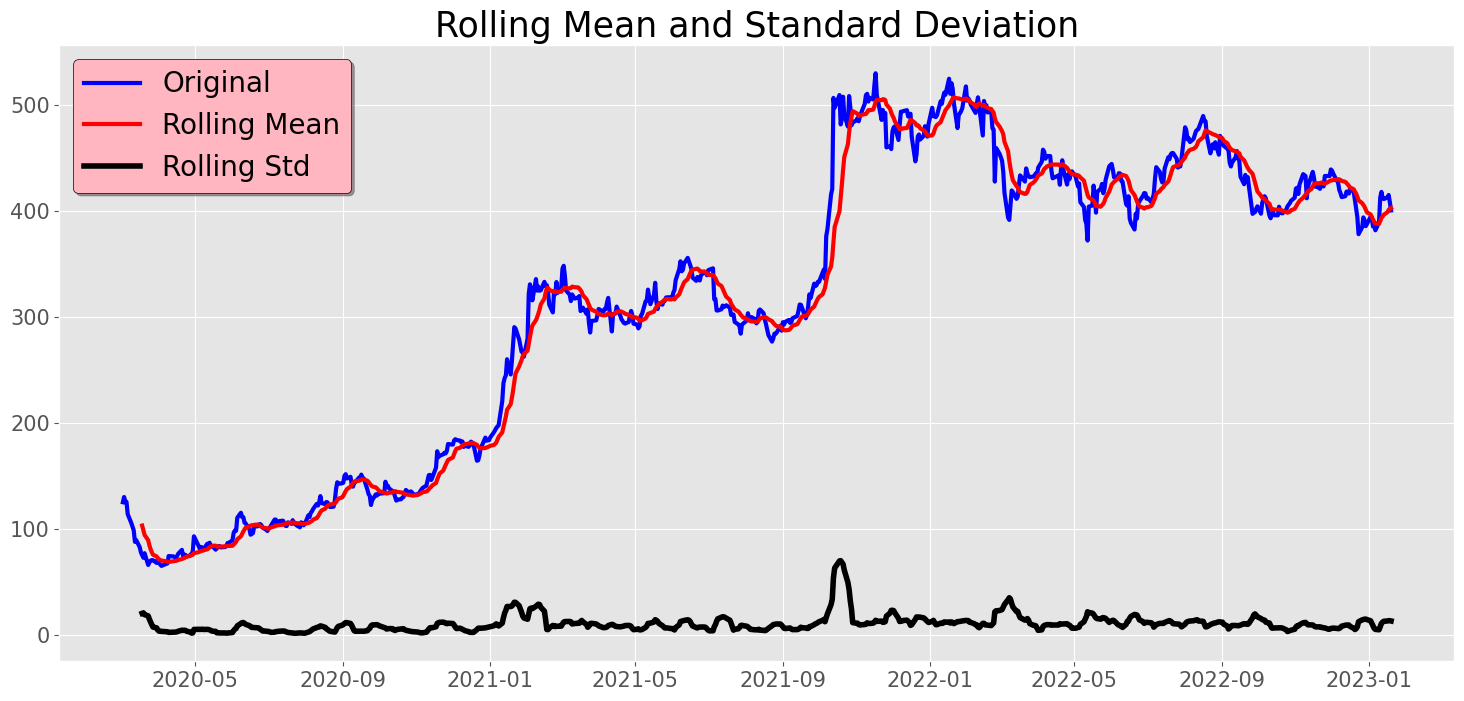

Results of dickey fuller test
Test Statistics                 -1.350158
p-value                          0.605925
No. of lags used                 4.000000
Number of observations used    714.000000
critical value (1%)             -3.439542
critical value (5%)             -2.865596
critical value (10%)            -2.568930
dtype: float64


In [59]:
test_stationarity(stock_data['Close'])

<hr style="border:1px solid black"> </hr>
We can't reject the Null hypothesis because the p-value is bigger than 0.05. Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.
So, to make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.


In [60]:
# Making a dataframe

df_close=stock_data['Close']

In [61]:
df_close

Date
2020-03-02    125.400002
2020-03-03    130.350006
2020-03-04    126.199997
2020-03-05    125.750000
2020-03-06    114.199997
                 ...    
2023-01-13    411.500000
2023-01-16    413.000000
2023-01-17    415.299988
2023-01-18    408.399994
2023-01-19    400.750000
Name: Close, Length: 719, dtype: float64

In [62]:
# 1st difference

125.400002-130.350006

-4.950004000000007

In [64]:
# 2nd difference

126.199997-130.350006

-4.150009000000011

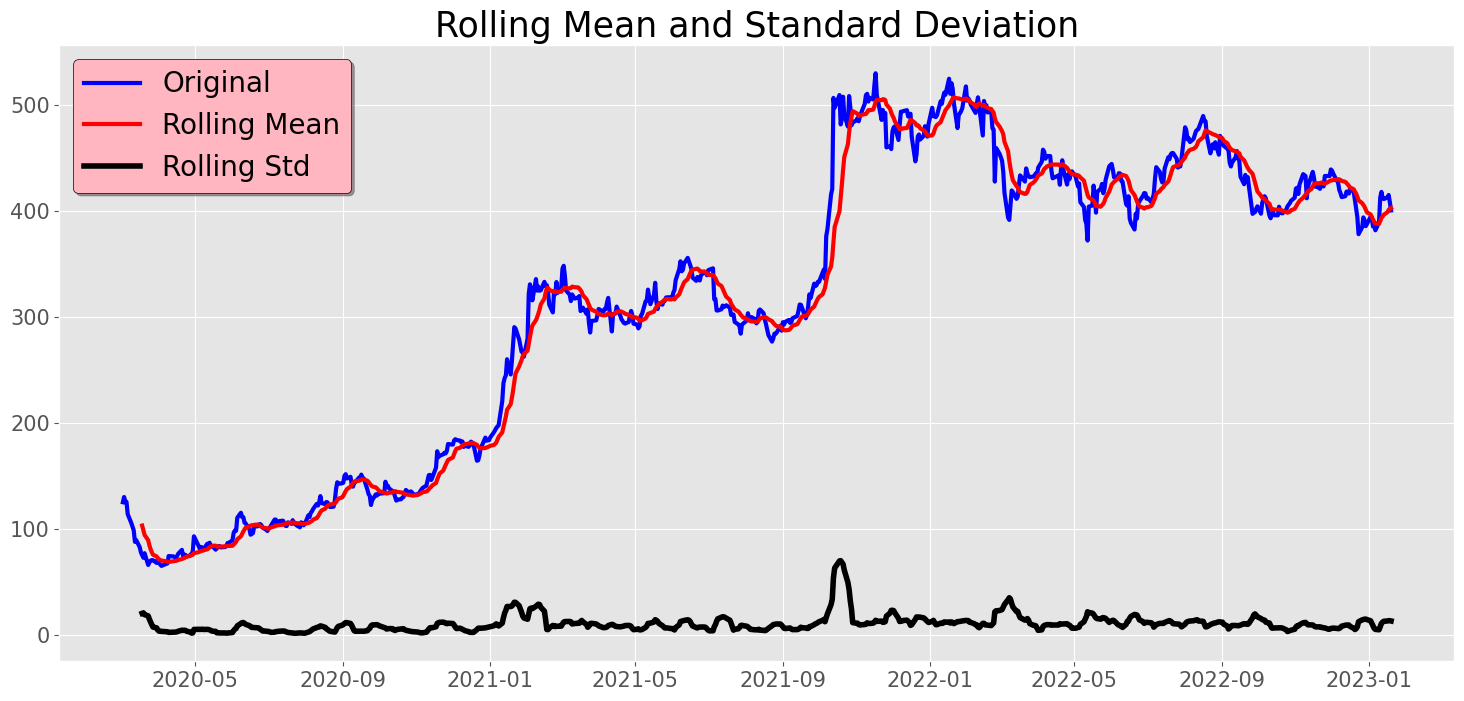

Results of dickey fuller test
Test Statistics                 -1.350158
p-value                          0.605925
No. of lags used                 4.000000
Number of observations used    714.000000
critical value (1%)             -3.439542
critical value (5%)             -2.865596
critical value (10%)            -2.568930
dtype: float64


In [72]:
test_stationarity(df_close)

#### Report:
- p-value is 60%, which means our data is non-static.

In [66]:
# ist derivative

df_close.diff()

Date
2020-03-02          NaN
2020-03-03     4.950005
2020-03-04    -4.150009
2020-03-05    -0.449997
2020-03-06   -11.550003
                ...    
2023-01-13    -0.750000
2023-01-16     1.500000
2023-01-17     2.299988
2023-01-18    -6.899994
2023-01-19    -7.649994
Name: Close, Length: 719, dtype: float64

In [67]:
# Get the difference of each Adj Close point

tata_moto_close_diff_1 = df_close.diff()

In [68]:
tata_moto_close_diff_1

Date
2020-03-02          NaN
2020-03-03     4.950005
2020-03-04    -4.150009
2020-03-05    -0.449997
2020-03-06   -11.550003
                ...    
2023-01-13    -0.750000
2023-01-16     1.500000
2023-01-17     2.299988
2023-01-18    -6.899994
2023-01-19    -7.649994
Name: Close, Length: 719, dtype: float64

### do differencing until it converts into stationary data where mean and variance are constant


In [69]:
# Checking null values

tata_moto_close_diff_1.isna().sum()

1

In [70]:
tata_moto_close_diff_1.dropna(inplace=True)

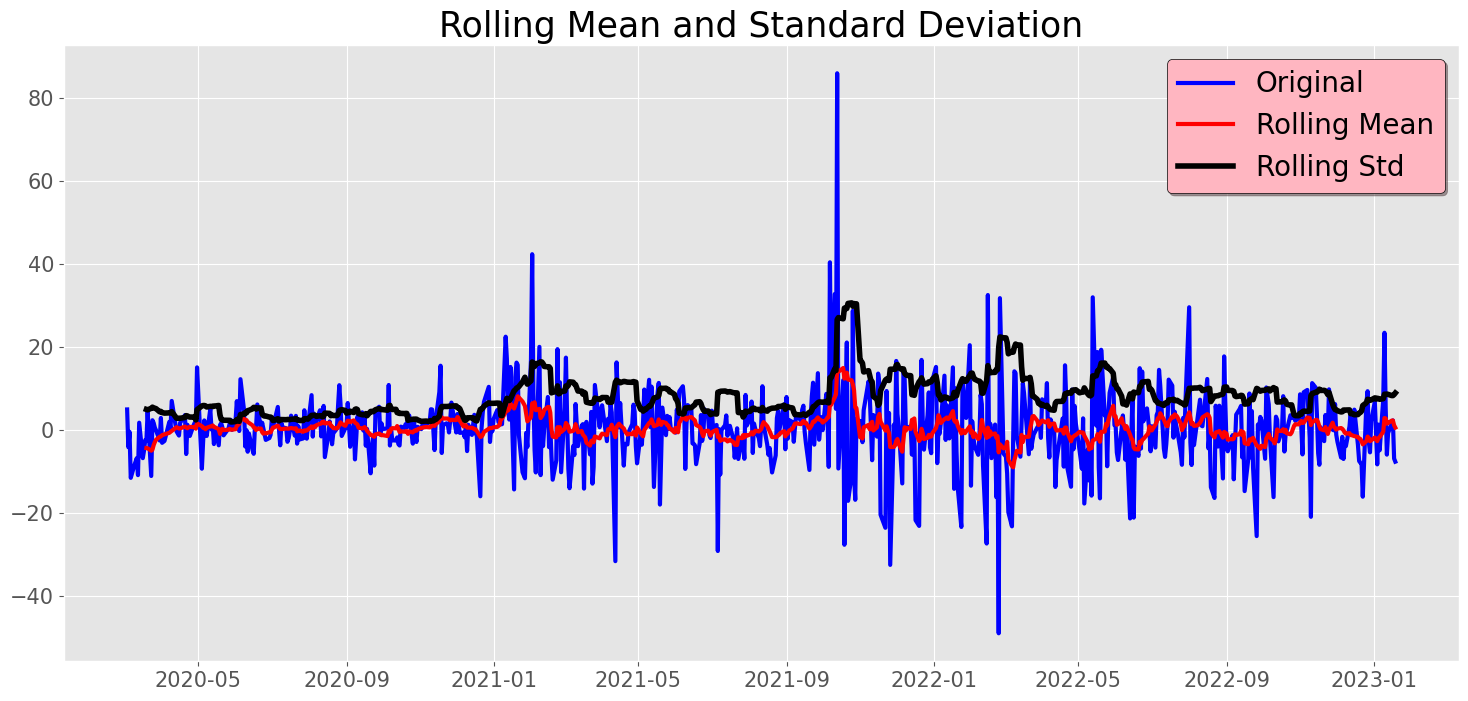

Results of dickey fuller test
Test Statistics               -1.303410e+01
p-value                        2.312505e-24
No. of lags used               3.000000e+00
Number of observations used    7.140000e+02
critical value (1%)           -3.439542e+00
critical value (5%)           -2.865596e+00
critical value (10%)          -2.568930e+00
dtype: float64


In [71]:
# Plot the tsla Adj Close 1st order difference

test_stationarity(tata_moto_close_diff_1)

#### Report:
- p-value is near to zero which defines stationary data.

we will try to check the treand in the data

breakdown

season cycle 

error as well


The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

We can reject the null hypothesis. So, the time series is in fact stationary.

**Decompose the time series :**
To start with, we want to decompose the data to seperate the seasonality, trend and residual. Since we have 3 years of stock data. We would expect there's a yearly or weekly pattern. Let's use a function seasonal_decompose in statsmodels to help us find it.

In [73]:
stock_data[["Close"]]

,Close
Date,
2020-03-02,125.400002
2020-03-03,130.350006
2020-03-04,126.199997
2020-03-05,125.750000
2020-03-06,114.199997
...,...
2023-01-13,411.500000
2023-01-16,413.000000
2023-01-17,415.299988


In [75]:
result=seasonal_decompose(stock_data[["Close"]],period=30)

<Figure size 2000x1000 with 0 Axes>

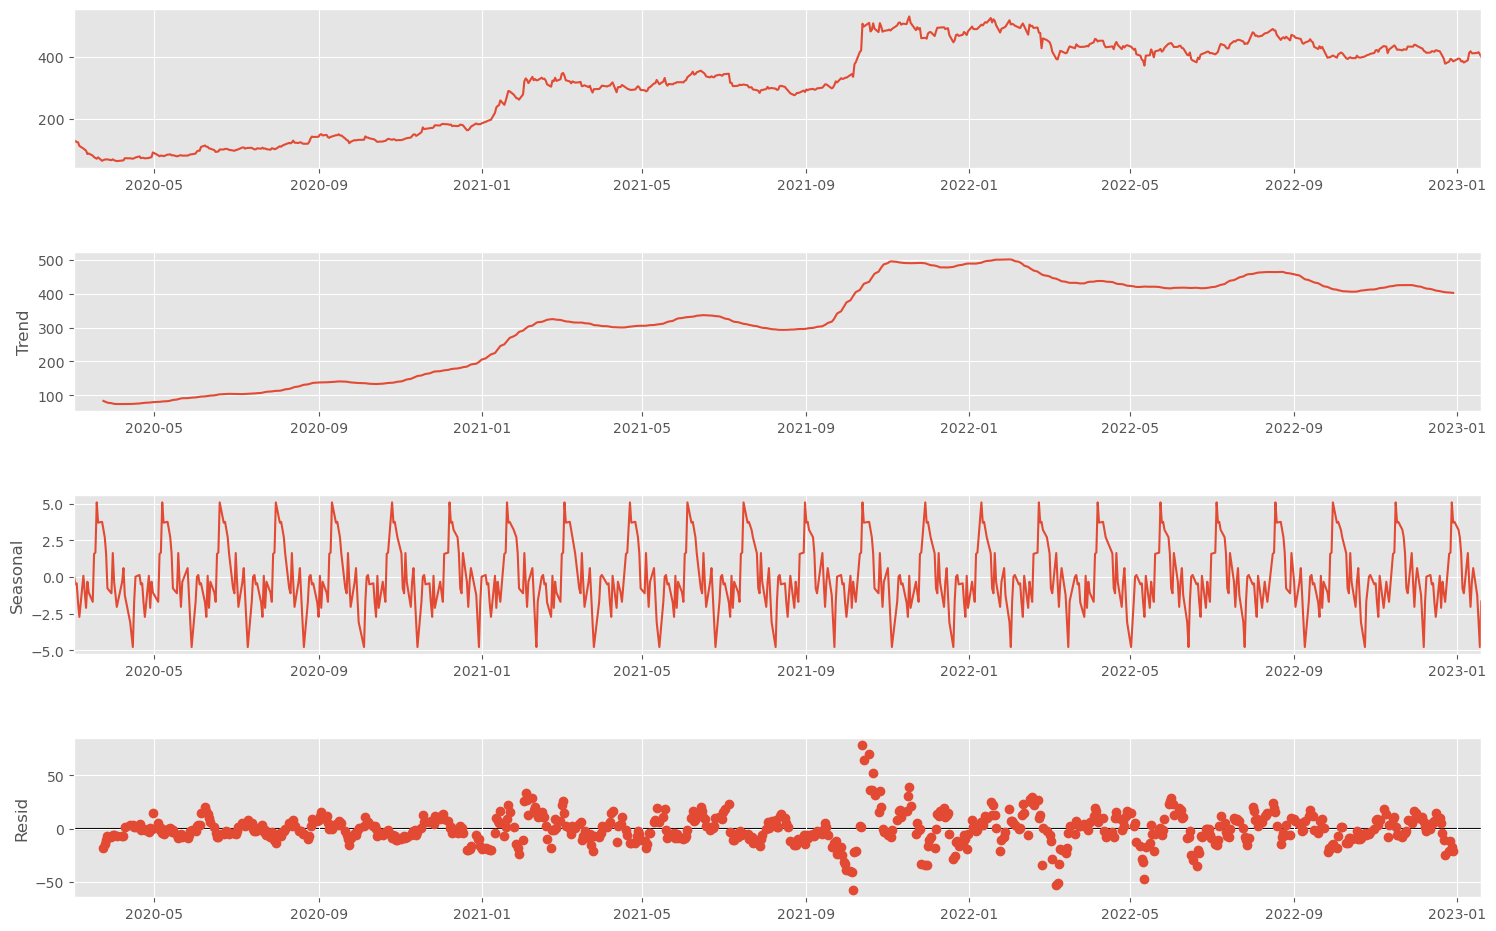

In [76]:
# Plotting Trend, cycle, season, error -->> Additive model

fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

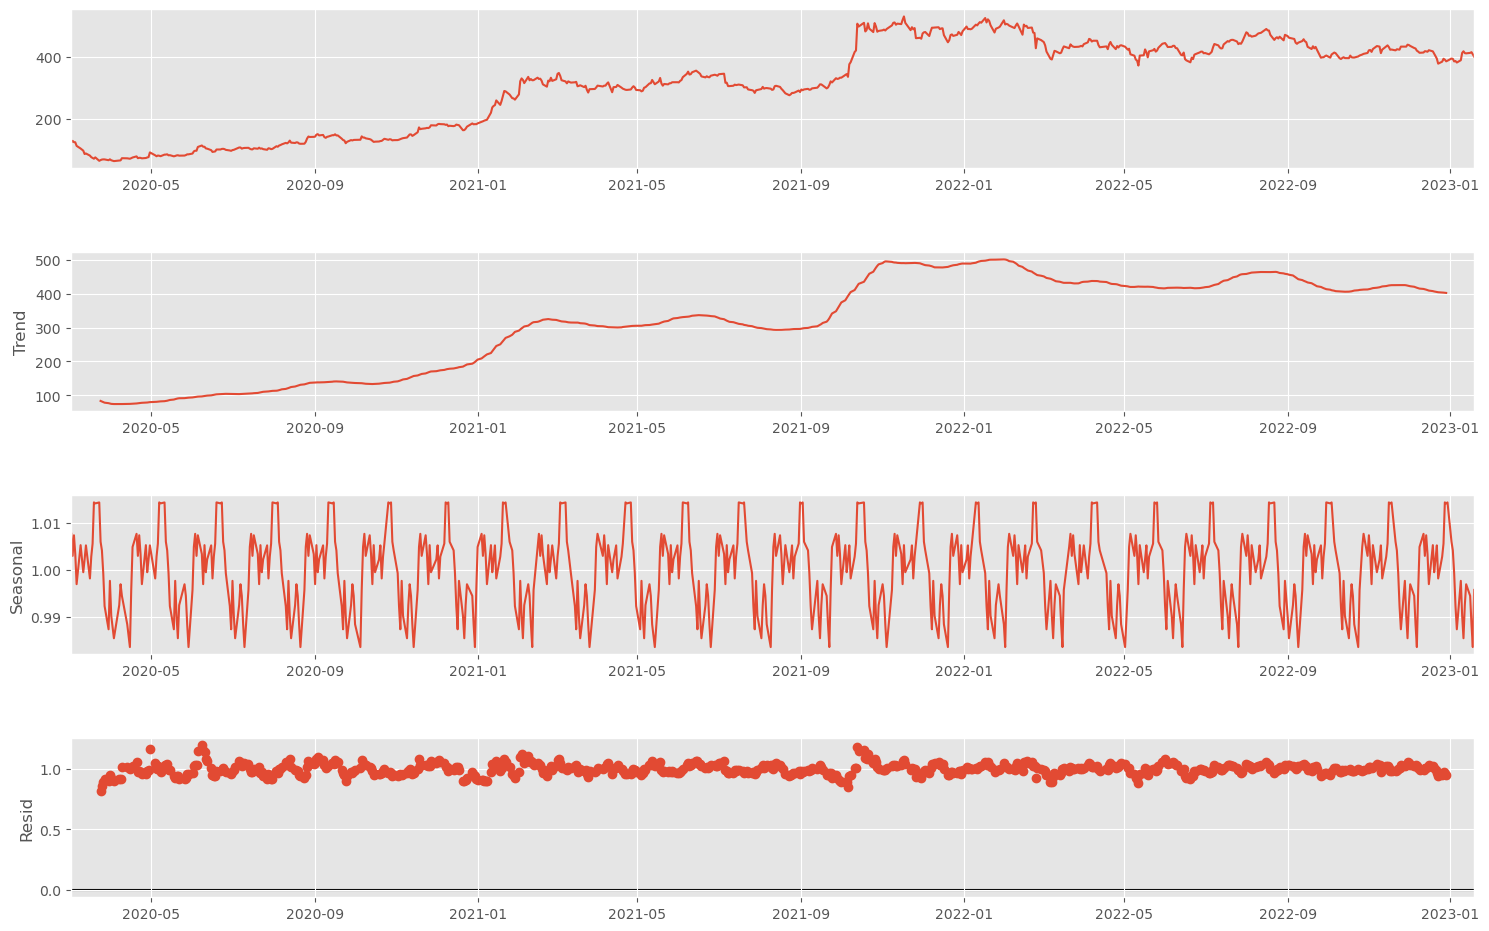

In [78]:
# Plotting Trend, cycle, season, error -->> Additive model

result=seasonal_decompose(stock_data[["Close"]],model="multiplicative",period=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [166]:
result

In [167]:
result.trend

Date
2020-03-02   NaN
2020-03-03   NaN
2020-03-04   NaN
2020-03-05   NaN
2020-03-06   NaN
              ..
2023-01-13   NaN
2023-01-16   NaN
2023-01-17   NaN
2023-01-18   NaN
2023-01-19   NaN
Name: trend, Length: 719, dtype: float64

In [168]:
result.seasonal

Date
2020-03-02    1.007734
2020-03-03    1.003026
2020-03-04    1.007420
2020-03-05    1.003413
2020-03-06    0.996988
                ...   
2023-01-13    0.996967
2023-01-16    0.994487
2023-01-17    0.988428
2023-01-18    0.983559
2023-01-19    0.995757
Name: seasonal, Length: 719, dtype: float64

In [169]:
result.resid

Date
2020-03-02   NaN
2020-03-03   NaN
2020-03-04   NaN
2020-03-05   NaN
2020-03-06   NaN
              ..
2023-01-13   NaN
2023-01-16   NaN
2023-01-17   NaN
2023-01-18   NaN
2023-01-19   NaN
Name: resid, Length: 719, dtype: float64

In [170]:
result.observed

Date
2020-03-02    125.400002
2020-03-03    130.350006
2020-03-04    126.199997
2020-03-05    125.750000
2020-03-06    114.199997
                 ...    
2023-01-13    411.500000
2023-01-16    413.000000
2023-01-17    415.299988
2023-01-18    408.399994
2023-01-19    400.750000
Length: 719, dtype: float64

Now we'll create an ARIMA model and train it using the train data's stock closing price. So, let’s visualize the data by dividing it into training and test sets.

In [82]:
# Preparing training data, where prediction will be after every 60 records

train_data=df_close[0:-60]

In [80]:
# Preparing test data

test_data=df_close[-60:]

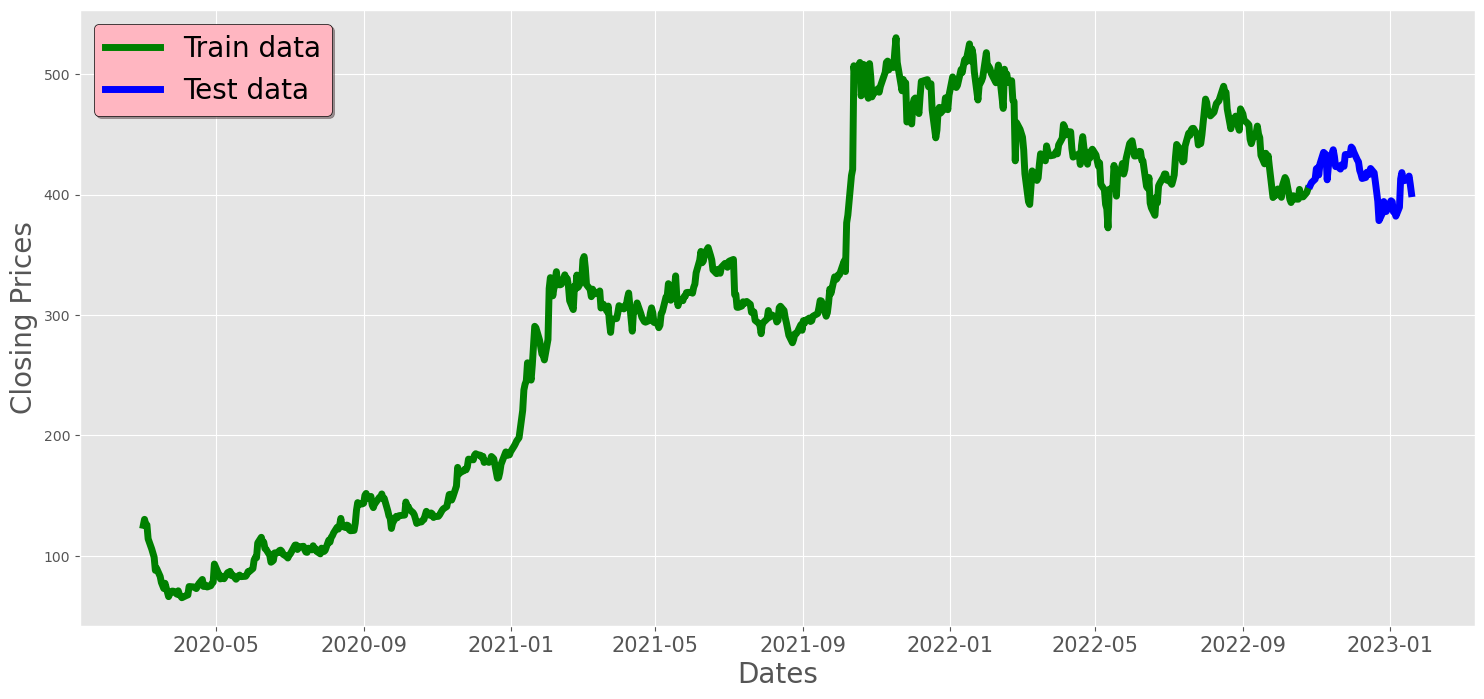

In [83]:
#split data into train and training set

train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

## Auto-correlations

After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

-------------------------------------
- **Autocorrelation function plot (ACF):**
Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.

Normally, we employ either the AR term or the MA term in an ARIMA model. Both of these phrases are rarely used on rare occasions. The ACF plot is used to determine which of these terms we should utilise for our time series.
 - If the autocorrelation at lag 1 is positive, we utilise the AR model.
 - If the autocorrelation at lag 1 is negative, we employ the MA model.

We move on to Partial Autocorrelation function plots (PACF) after plotting the ACF plot.

------------------------------
- **Partial Autocorrelation function plots (PACF)**
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

If the PACF plot drops off at lag n, then use an AR(n) model and if the drop in PACF is more gradual then we use the MA term.

Use AR terms in the model when the
- ACF plots show autocorrelation decaying towards zero
- PACF plot cuts off quickly towards zero
- ACF of a stationary series shows positive at lag-1

Use MA terms in the model when the model is
- Negatively Autocorrelated at Lag — 1
- ACF that drops sharply after a few lags
- PACF decreases more gradually

<hr style="border:1px solid black"> </hr>

In [89]:
var1= tata_moto_close_diff_1

In [91]:
var= tata_moto_close_diff_1[1:]

In [86]:
df=pd.DataFrame([var,var1])

In [92]:
df.T.corr

<bound method DataFrame.corr of                 Close      Close
Date                            
2020-03-03        NaN   4.950005
2020-03-04  -4.150009  -4.150009
2020-03-05  -0.449997  -0.449997
2020-03-06 -11.550003 -11.550003
2020-03-09  -8.500000  -8.500000
...               ...        ...
2023-01-13  -0.750000  -0.750000
2023-01-16   1.500000   1.500000
2023-01-17   2.299988   2.299988
2023-01-18  -6.899994  -6.899994
2023-01-19  -7.649994  -7.649994

[718 rows x 2 columns]>

In [96]:
# returns the cross-correlation of two vectors

np.correlate(var1,var)

array([-1344.9875996 , 60848.80873558])

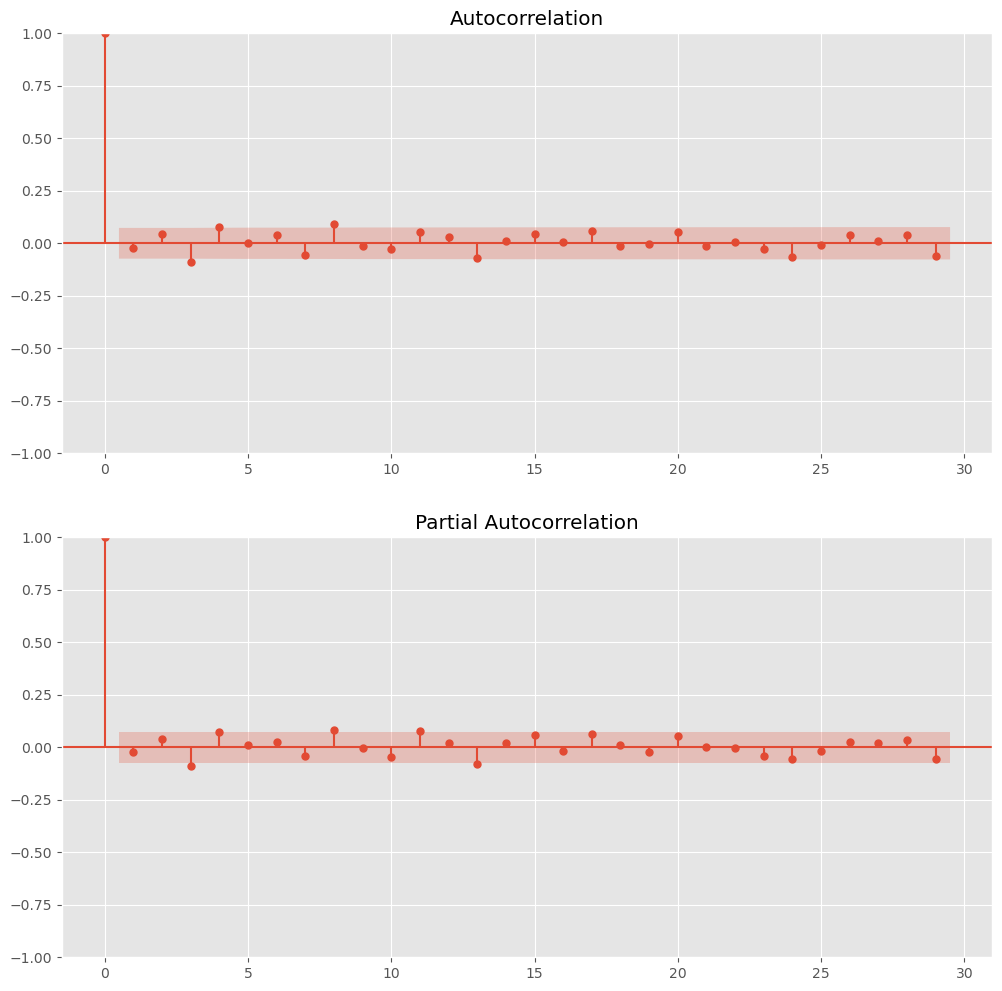

In [98]:
# Plotting ACF and PACF graph

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(tata_moto_close_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(tata_moto_close_diff_1, ax=ax2)

- To estimate the amount of AR terms(**p**), you need to look at the PACF plot. First, ignore the value at lag 0. It will always show a perfect correlation, since we are estimating the correlation between today’s value with **itself**. Note that there is a coloured area in the plot, representing the confidence interval. To estimate how much AR terms you should use, start counting how many spikes are above or below the confidence interval before the next one enter the coloured area. So, looking at the PACF plot above, we can estimate to use 0 AR terms for our model, since no any spikes are out of the confidence interval.

---------------------------------------

- To calculate **d**, all you need to know how many differencing was used to make the series stationary. In our case, we have used order of 1st order differencing to make our data stationary.

---------------------------------------

- To estimate the amount of MA terms (**q**), this time you will look at ACF plot. The same logic is applied here: how many spikes are above or below the confidence interval before the next spike enters the coloured area? Here, we can estimate 0 MA terms, since no spike is out of the confidence interval.

So, we will use (0,1,0) order to fit ARIMA model.

We can also use different orders of p, d and q to get the best order with lowest AIC.

In [99]:
6# evaluate an ARIMA model for a given order (p,d,q)

def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [100]:
float("inf")

inf

In [101]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [102]:
p_values = range(0, 3)

In [103]:
list(p_values)

[0, 1, 2]

In [104]:
train_data

Date
2020-03-02    125.400002
2020-03-03    130.350006
2020-03-04    126.199997
2020-03-05    125.750000
2020-03-06    114.199997
                 ...    
2022-10-19    399.049988
2022-10-20    398.100006
2022-10-21    398.049988
2022-10-24    401.600006
2022-10-25    404.549988
Name: Close, Length: 659, dtype: float64

In [105]:
test_data

Date
2022-10-27    407.700012
2022-10-28    409.899994
2022-10-31    412.750000
2022-11-01    421.350006
2022-11-02    422.149994
2022-11-03    416.250000
2022-11-04    425.350006
2022-11-07    435.000000
2022-11-09    433.149994
2022-11-10    412.200012
2022-11-11    423.500000
2022-11-14    433.700012
2022-11-15    437.149994
2022-11-16    431.549988
2022-11-17    423.149994
2022-11-18    423.799988
2022-11-21    421.100006
2022-11-22    424.700012
2022-11-23    424.049988
2022-11-24    423.399994
2022-11-25    433.200012
2022-11-28    433.250000
2022-11-29    433.149994
2022-11-30    439.399994
2022-12-01    438.250000
2022-12-02    435.399994
2022-12-05    428.750000
2022-12-06    427.100006
2022-12-07    420.100006
2022-12-08    417.200012
2022-12-09    413.299988
2022-12-12    414.149994
2022-12-13    418.500000
2022-12-14    417.899994
2022-12-15    416.700012
2022-12-16    421.600006
2022-12-19    418.000000
2022-12-20    410.500000
2022-12-21    402.600006
2022-12-22    394.45

In [107]:
# evaluate parameters

p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

In [108]:
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=105.897
ARIMA(0, 0, 1) RMSE=54.947
ARIMA(0, 0, 2) RMSE=37.231
ARIMA(0, 1, 0) RMSE=7.048
ARIMA(0, 1, 1) RMSE=7.085
ARIMA(0, 1, 2) RMSE=7.179
ARIMA(0, 2, 0) RMSE=8.949
ARIMA(0, 2, 1) RMSE=7.072
ARIMA(0, 2, 2) RMSE=7.111
ARIMA(1, 0, 0) RMSE=7.045
ARIMA(1, 0, 1) RMSE=7.080
ARIMA(1, 0, 2) RMSE=7.176
ARIMA(1, 1, 0) RMSE=7.090
ARIMA(1, 1, 1) RMSE=7.185
ARIMA(1, 1, 2) RMSE=7.174
ARIMA(1, 2, 0) RMSE=9.270
ARIMA(1, 2, 1) RMSE=7.118
ARIMA(1, 2, 2) RMSE=7.215
ARIMA(2, 0, 0) RMSE=7.085
ARIMA(2, 0, 1) RMSE=7.181
ARIMA(2, 0, 2) RMSE=7.144
ARIMA(2, 1, 0) RMSE=7.207
ARIMA(2, 1, 1) RMSE=7.180
ARIMA(2, 1, 2) RMSE=7.148
ARIMA(2, 2, 0) RMSE=8.769
ARIMA(2, 2, 1) RMSE=7.226
ARIMA(2, 2, 2) RMSE=7.201
Best ARIMA(1, 0, 0) RMSE=7.045


In [110]:
# Best ARIMA order

arima_order=(1,0,0)

In [111]:
# Old(History) data

history = [x for x in train_data]

In [112]:
history

[125.4000015258789,
 130.35000610351562,
 126.1999969482422,
 125.75,
 114.1999969482422,
 105.6999969482422,
 98.9000015258789,
 88.0,
 89.75,
 82.94999694824219,
 77.94999694824219,
 75.5,
 72.94999694824219,
 77.30000305175781,
 66.19999694824219,
 68.55000305175781,
 70.25,
 70.80000305175781,
 70.69999694824219,
 68.1500015258789,
 71.05000305175781,
 67.94999694824219,
 65.30000305175781,
 67.25,
 67.5999984741211,
 74.5999984741211,
 74.25,
 72.9000015258789,
 74.6500015258789,
 76.8499984741211,
 80.44999694824219,
 74.6500015258789,
 75.9000015258789,
 75.6500015258789,
 74.19999694824219,
 75.25,
 76.94999694824219,
 78.1500015258789,
 93.25,
 83.9000015258789,
 80.9000015258789,
 83.19999694824219,
 82.5,
 81.05000305175781,
 86.0999984741211,
 86.19999694824219,
 87.19999694824219,
 83.80000305175781,
 84.3499984741211,
 80.6500015258789,
 81.80000305175781,
 83.44999694824219,
 84.0999984741211,
 82.80000305175781,
 83.0999984741211,
 84.55000305175781,
 87.0,
 87.0,
 89.5

In [113]:
# Model

model = ARIMA(history, order=arima_order)

In [114]:
# Model Fitting 

model_fit = model.fit()

In [115]:
# Summary of data

model_fit.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  659
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2412.687
Date:                Thu, 19 Jan 2023   AIC                           4831.373
Time:                        21:46:09   BIC                           4844.845
Sample:                             0   HQIC                          4836.595
                                - 659                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        304.6763     96.841      3.146      0.002     114.871     494.482
ar.L1          0.9979      0.003    379.651      0.000       0.993       1.003
sigma2        87.8921      1.786     49.215      0.000      84.392      91.392
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):              5104.36
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               4.74   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
yhat = model_fit.forecast()
yhat

array([404.33648373])

In [119]:
test_data[0]-yhat

array([3.36352847])

From both the method, we get the same order (0,1,0)

In [123]:
history = [x for x in train_data]
prediction = list()

for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,0))
    model2 = model.fit()
    fc = model2.forecast(alpha = 0.05)[0]
    prediction.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, prediction)))


RMSE of ARIMA Model: 7.0479527755332585


In [124]:
len(df_close)+60

779

In [147]:
len(history)

719

In [146]:
# Prediction 

len(model2.predict())

718

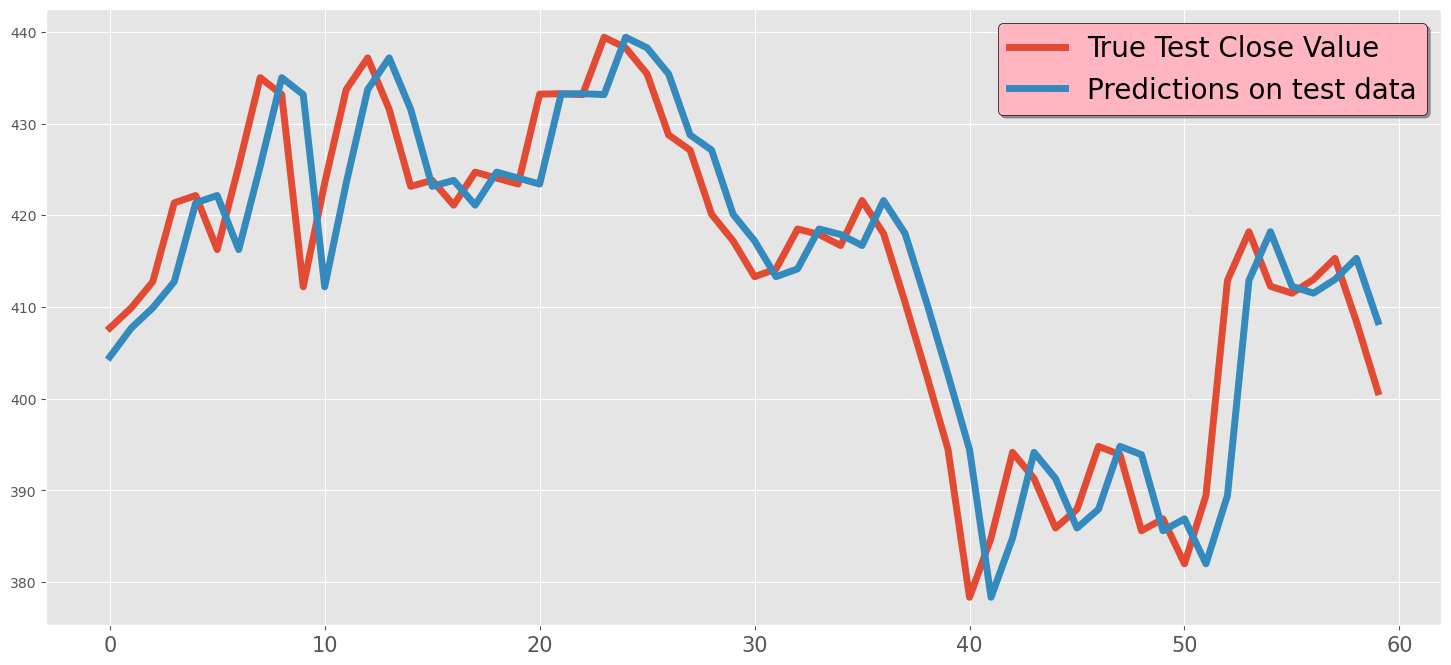

In [130]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(prediction)), prediction, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()


# Forecasting for next 60 days

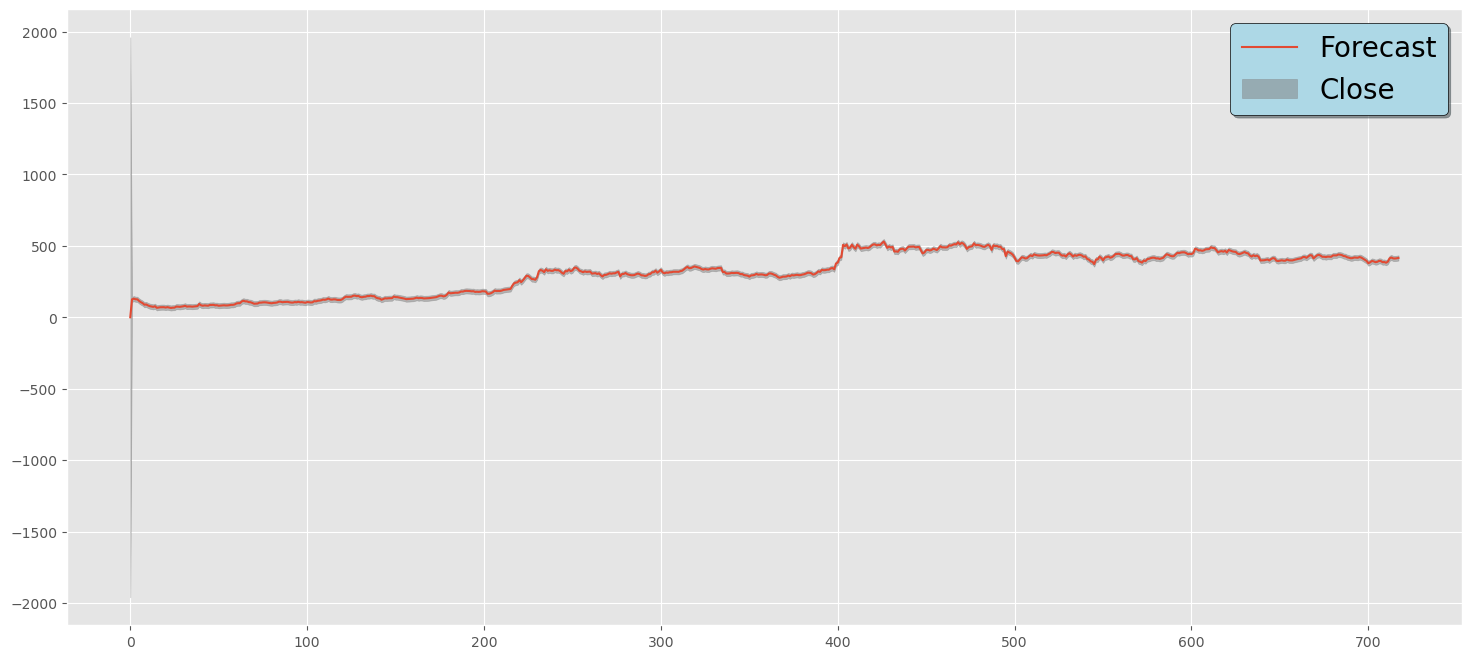

In [154]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(model2, ax=ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()


Although our model is good but this model has trouble forecasting long-term data. This is possible because ARIMA is a sensitive algorithm and not a broad algorithm for predicting. Stock data, on the other hand, rarely show seasonality that can be detected using the ARIMA model.
Forecasting is thought to be easier if there is a visible or hidden pattern that repeats itself throughout time. 
Stock prices, on the other hand, are far too complicated to be modelled. There are so may external and dynamic factor affecting the price.


<hr style="border:1px solid black"> </hr>
**A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.
ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.**

#  Introduction to SARIMA Models

SARIMA (Seasonal ARIMA) is a modification of ARIMA that explicitly allows univariate time series data with a seasonal component. SARIMA accepts an additional set of parameters (P,D,Q)m that specify the model's seasonal components.

- P: Seasonal auto regressive order
- D: Seasonal difference order
- Q: Seasonal moving average order
- m: The number of time steps for a single seasonal period

This is written as (p,d,q)×(P,D,Q)m.

- From the ACF and PACF that we have plotted, we can determine the value of Seasonal (P,D,Q).
    In ACF and PACF, we have one spike at lag 3 that is out of confidence interval and also there is no significant correlation at lag 3 and lag 6. So, the order of P and Q is (1, 1).
    As we have used differencing of 1 to make data stationary so, D = 1. So, the best order for SARIMA is(0,1,0)x(1,1,1)3

In [150]:
train_data=tata_moto_close_diff_1[0:-60]
test_data=tata_moto_close_diff_1[-60:]

In [151]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 9.144630040551668


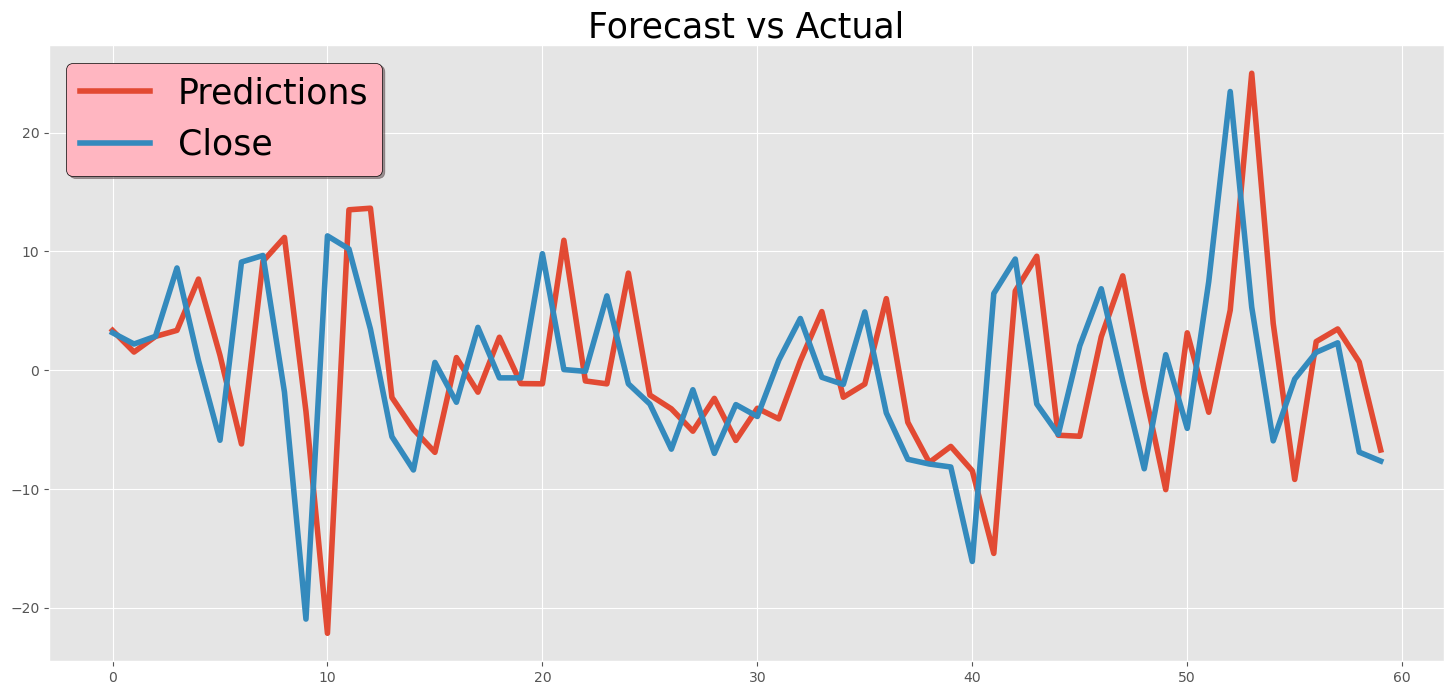

In [152]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

## Auto ARIMA

Automatically discover the optimal order for an ARIMA model.
After identifying the most optimal parameters for an ARIMA model, the auto arima function provides a fitted ARIMA model. This function is based on the commonly used forecast::auto. Arima R function.

The auro arima function fits models within the start p, max p, start q, max q ranges using differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey–Fuller, or Phillips–Perron) to identify the order of differencing, d. If the seasonal option is enabled, D, auto arima additionally aims to identify the ideal P and Q hyper-parameters after doing the Canova-Hansen to determine the optimal order of seasonal differencing.

RMSE of Auto ARIMA Model : 7.184581189586465


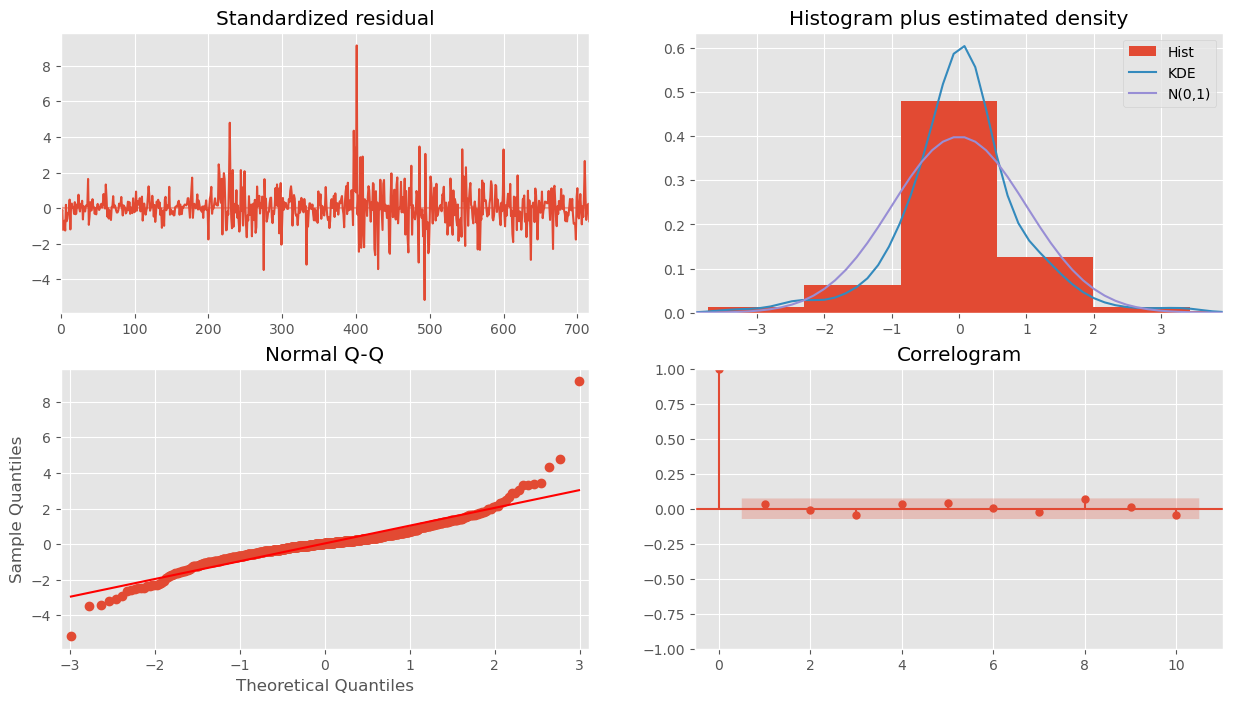

In [153]:
train_data=df_close[0:-60]
test_data=df_close[-60:]
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**Top left**: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

**Top Right**: The density plot on the top right suggests a normal distribution with a mean of zero.

**Bottom left**: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

**Bottom Right**: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

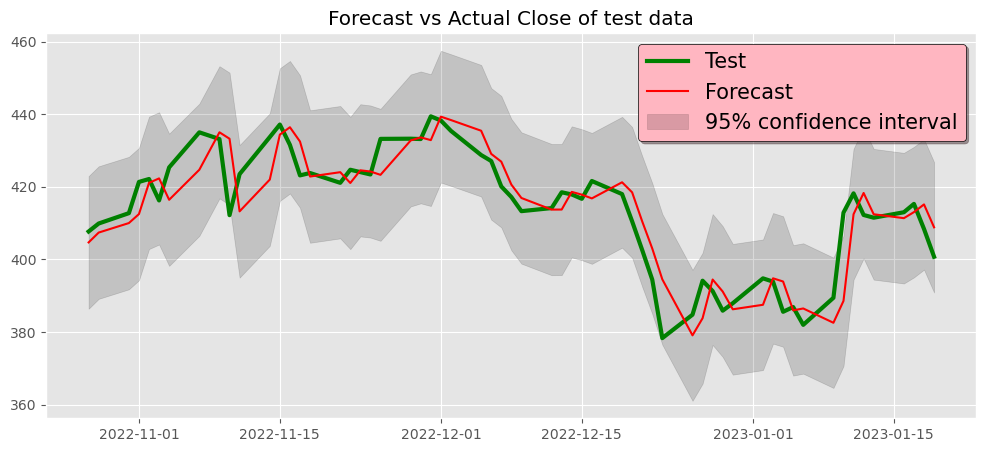

In [155]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend(fontsize = 15, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

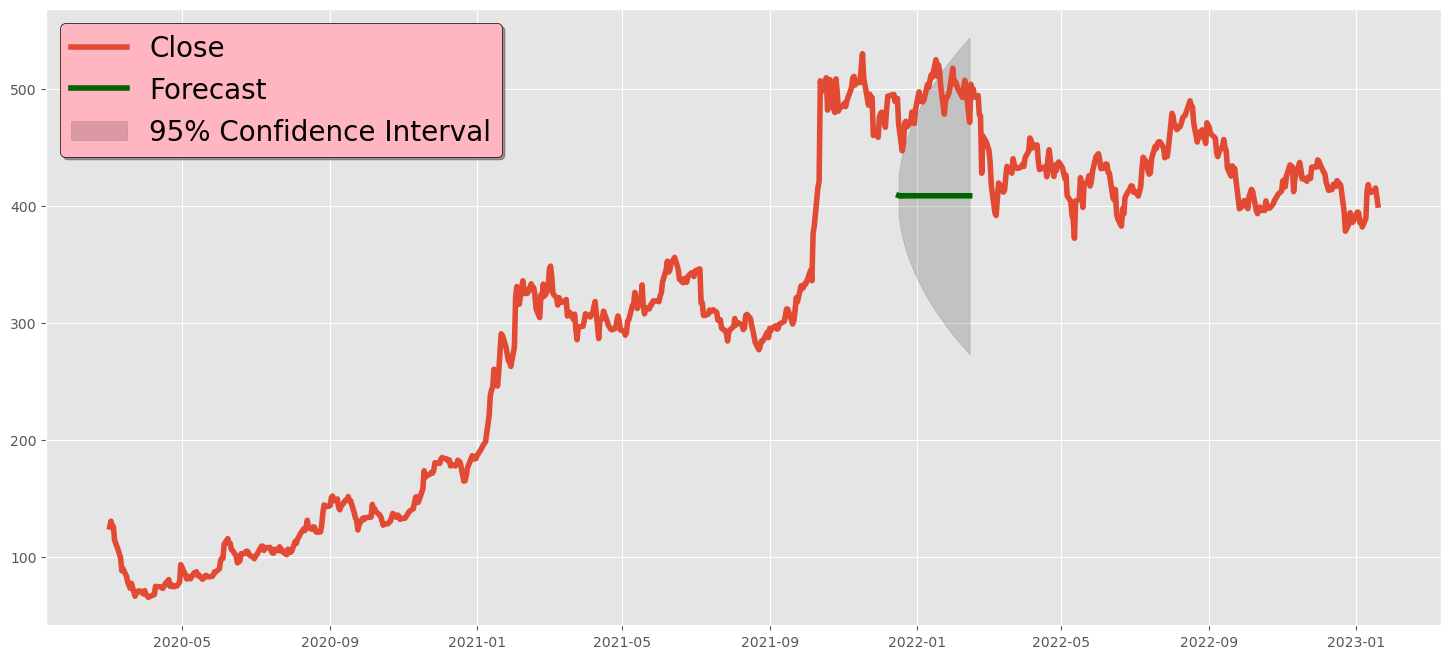

In [156]:
fc, confint = model_autoARIMA.predict(n_periods=60, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=pd.date_range(start='17/12/2021', periods=60))
lower_series = pd.Series(confint[:, 0], index=pd.date_range(start='17/12/2021', periods=60))
upper_series = pd.Series(confint[:, 1], index=pd.date_range(start='17/12/2021', periods=60))

# Plot
plt.figure(figsize = (18,8))
plt.plot(df_close, linewidth = 4, label = 'Close')
plt.plot(fc_series, color='darkgreen', linewidth = 4, label = 'Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label = '95% Confidence Interval')
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()